<ipython-input-1-bf9b8f324b87>:15: RuntimeWarning: overflow encountered in square
  mse = np.mean((pred - y) ** 2)
<ipython-input-1-bf9b8f324b87>:16: RuntimeWarning: overflow encountered in square
  reg = λ * np.sum(theta ** 2)
<ipython-input-1-bf9b8f324b87>:21: RuntimeWarning: overflow encountered in multiply
  grad = (2 / len(y)) * X.T @ (pred - y) + 2 * λ * theta
<ipython-input-1-bf9b8f324b87>:33: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * grad


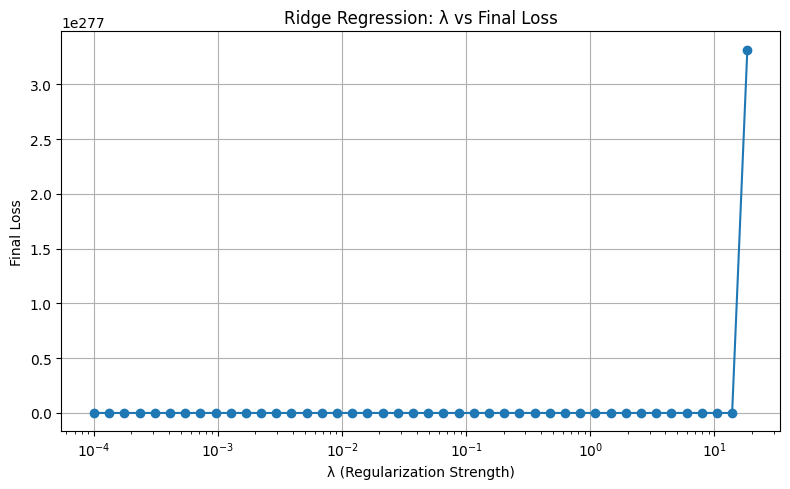

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

# 生成合成数据
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = y - np.mean(y)

# Ridge回归 from scratch 实现
def ridge_loss(theta, X, y, λ):
    pred = X @ theta
    mse = np.mean((pred - y) ** 2)
    reg = λ * np.sum(theta ** 2)
    return mse + reg

def ridge_gradient(theta, X, y, λ):
    pred = X @ theta
    grad = (2 / len(y)) * X.T @ (pred - y) + 2 * λ * theta
    return grad

# 测试不同 λ 对损失的影响
lambdas = np.logspace(-4, 2, 50)
losses = []

for λ in lambdas:
    theta = np.random.randn(X.shape[1])
    learning_rate = 0.1
    for _ in range(300):
        grad = ridge_gradient(theta, X_scaled, y_scaled, λ)
        theta -= learning_rate * grad
    loss = ridge_loss(theta, X_scaled, y_scaled, λ)
    losses.append(loss)

# 可视化 λ vs 损失函数值
plt.figure(figsize=(8, 5))
plt.plot(lambdas, losses, marker='o')
plt.xscale('log')
plt.xlabel("λ (Regularization Strength)")
plt.ylabel("Final Loss")
plt.title("Ridge Regression: λ vs Final Loss")
plt.grid(True)
plt.tight_layout()
plt.show()
